# Deep Learning - Introduction à Pytorch


## TP1 : Prise en main de Pytorch

Sylvain Lamprier (sylvain.lamprier@univ-angers.fr)

Supports adaptés de Nicolas Baskiotis (nicolas.baskiotis@sorbonne-univeriste.fr) et Benjamin Piwowarski (benjamin.piwowarski@sorbonne-universite.fr) -- MLIA/ISIR, Sorbonne Université



Les lignes suivantes permettent d'importer pytorch et vérifier qu'un GPU est disponible. Il est recommandé d'utiliser un manager d'environnement python type conda pour l'ensemble des tps. Après la création de votre environnement (via  $\texttt{conda create --name <nom_env>}$) et son activation (via $\texttt{conda activate <nom_env>}$), installer pytorch selon la commande donnée sur le site de $\href{https://pytorch.org/}{\texttt{PyTorch}}$  (choisir la version en fonction de votre GPU et sa version de cuda).  

In [1]:
from xxlimited_35 import error

import torch
from triton.language import tensor

print("La version de torch est : ",torch.__version__)
print("Le calcul GPU est disponible ? ", torch.cuda.is_available())

import numpy as np
import sklearn


La version de torch est :  2.5.1+cu124
Le calcul GPU est disponible ?  False


### <span class="alert-success"> Exercice : Syntaxe

Le principal objet manipulé sous Pytorch est **torch.Tensor** qui correspond à un tenseur mathématique (généralisation de la notion de matrice en $n$-dimensions), très proche dans l'utilisation de **numpy.array**.   Cet objet est optimisé pour les calculs sur GPU ce qui implique quelques contraintes plus importantes que sous **numpy**. En particulier :
* le type du tenseur manipulé est très important et les conversions ne sont pas automatique (**FloatTensor** de type **torch.float**, **DoubleTensor** de type **torch.double**,  **ByteTensor** de type **torch.byte**, **IntTensor** de type **torch.int**, **LongTensor** de type **torch.long**). Pour un tenseur **t** La conversion se fait très simplement en utilisant les fonctions : **t.double()**, **t.float()**, **t.long()** ...
* la plupart des opérations ont une version *inplace*, c'est-à-dire qui modifie le tenseur plutôt que de renvoyer un nouveau tenseur; elles sont suffixées par **_** (**add_** par exemple).

Donner des exemples d'instructions correspondant aux commentaires ci-dessous. N'hésitez pas à vous référez à la [documentation officielle](https://pytorch.org/docs/stable/tensors.html) pour la liste exhaustive des opérations.


In [2]:
# Création de tenseurs et caractéristiques
## Créer un tenseur (2,3) à partir d'une liste
a = torch.tensor([[1,2,3],[4,5,6]])

## Créer un tenseur  tenseur rempli de 1 de taille 2x3x4
b = torch.ones(2,3,4)

## tenseur de zéros de taille 2x3 de type float
c = torch.zeros(2,3,dtype=torch.float)

## tirage uniforme entier entre 10 et 15 de taille 50
## remarquez l'utilisation du _ dans random pour l'opération inplace
d = torch.randint(10,15,(50,))


## tirage suivant la loi normale
d = torch.normal(mean=5,std=2,size=(50,))

## equivalent à zeros(3,4).normal_
e = torch.zeros(3,4).normal_()

## Création d'un vecteur de 3 flottants selon la loi de normale
vecteur_normal_standard = torch.randn(3)

## concatenation de tenseurs sur la dimension 0
A = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# Tenseur B de taille (3, 3)
B = torch.tensor([[7, 8, 9],
                  [10, 11, 12],
                  [13, 14, 15]])
f = torch.cat([A, B], dim=0)
# f = [[ 1,  2,  3],
#      [ 4,  5,  6],
#      [ 7,  8,  9],
#      [10, 11, 12],
#      [13, 14, 15]]

## concatenation de tenseurs  sur la dimension 1
A = torch.tensor([[1, 2, 3],
                  [4, 5, 6]])

# Tenseur B de taille (2, 3)
B = torch.tensor([[7, 8, 9],
                  [10, 11, 12]])
tensor_concat = torch.cat([A, B], dim=1)
# tensor_concat = [[ 1,  2,  3,  7,  8,  9],
#                  [ 4,  5,  6, 10, 11, 12]]

## Taille des tenseurs/vecteurs
tensor_concat.size()

## Conversion de type

# Opérations élémentaires sur les tenseurs
## produit scalaire (et contrairement à numpy, que produit scalaire)
# le produit scalaire consiste à multiplier les éléments de deux tenseurs et à les additionner
produit_scalaire = torch.dot(torch.tensor([2, 3]), torch.tensor([2, 1]))
# consiste a : 2*2 + 3*1 = 7

## produit matriciel : utilisation de @ ou de la fonction mm
# le produit matriciel consiste à multiplier les lignes de la première matrice par les colonnes de la deuxième
A = torch.tensor([[1, 2],
                  [3, 4]])
B = torch.tensor([[2, 0],
                  [1, 3]])
produit_matriciel = A @ B
#consite a : [[1*2 + 2*1, 1*0 + 2*3],

## transposé
A = torch.tensor([[1,2,3],[4,5,6]])
transposed_A = A.t()

## index du maximum selon une dimension
A = torch.tensor([[1, 2, 3],[4, 5, 6]])
max_index = torch.argmax(A, dim=1)

## somme selon une dimension/de tous les éléments
A = torch.tensor([[1, 2, 3],[4, 5, 6]])
sum_A = torch.sum(A, dim=1) # 1+2+3, 4+5+6
sum_A_dim0 = torch.sum(A, dim=0) # 1+4, 2+5, 3+6

## moyenne selon  une dimension/sur tous les éléments
A = torch.tensor([[1, 2, 3],[4, 5, 6]]).float()
mean_A_dim0 = torch.mean(A, dim=0) # (1+4)/2, (2+5)/2, (3+6)/2
mean_A_dim1 = torch.mean(A, dim=1) # (1+2+3)/3, (4+5+6)/3
mean_A = torch.mean(A) # (1+2+3+4+5+6)/6

## changer les dimensions du tenseur (la taille totale doit être inchangée)
A = torch.tensor([[1, 2, 3],[4, 5, 6]])
reshaped_A = A.view(3, 2)
# une view est une vue sur les données, les données ne sont pas copiées

## somme/produit/puissance termes a termes
A = torch.tensor([[1, 2, 3],[4, 5, 6]])
B = torch.tensor([[2, 0, 1],[1, 3, 2]])
sum_A_B = A + B
prod_A_B = A * B
pow_A_B = A ** B

## Soit un tenseur a de (2,3,4). Le recopier dans une version (2,3,3,4) avec les tenseurs (3,4)
## a[0] et a[1] recopiés chacun 3 fois (avec expand)
A = torch.rand(2,3,4)
A_expanded = A.unsqueeze(2).expand(2,3,3,4)
# (2,3,3,4)
#2 : Représente deux groupes.
#3 : Chaque groupe a 3 sous-ensembles.
#3 : ligne de chaque sous-ensemble
#4 : colonne de chaque sous-ensemble



## attention ! comme sous numpy, il peut y avoir des pièges !
## Vérifier toujours les dimensions !!
a=torch.zeros(5,1)
b = torch.zeros(5)
print(a,b)
## la première opération fait un broadcast et le résultat est 1 tenseur à 2 dimensions,
## le résultat de la deuxième opération est une matrice contenant un vecteur unique
print(a-b,a.t()-b)

tensor([[0.],
        [0.],
        [0.],
        [0.],
        [0.]]) tensor([0., 0., 0., 0., 0.])
tensor([[0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0.]]) tensor([[0., 0., 0., 0., 0.]])


### <span class="alert-success"> Exercice :   Régression linéaire  </span>

On souhaite apprendre un modèle de régression linéaire $f$ du type:  $f(x,w,b)=x.w^t+b$  avec $x\in \mathbb{R}^{{d}}$ un vecteur d'observations pour lequel on souhaite prédire une sortie $\hat{y} \in \mathbb{R}$, $w\in\mathbb{R}^{1,d}$ et $b\in \mathbb{R}$ les paramètres du modèle.

Pour cela on dispose d'un jeu de données étiquetées $\{(x,y)\}$, que l'on découpe en jeu d'entraînement (80%) et de validation (20%). Dans cet exercice, on utilisera le jeu de données très classique *Boston*, le prix des loyers à Boston en fonction de caractéristiques socio-économiques des quartiers.

On considèrera un coût moindres carrés pour apprendre le modèle sur le jeu d'entraînement (avec $N$ le nombre de données d'entraînement et $(x^i,y^i)$ le i-ème couple de cet ensemble): $$w^∗,b^∗=argmin_{w,b}\frac{1}{N} \sum_{i=1}^N \|f(x^i,w,b)-y^i\|^2$$


* Définir (en version tensorielle PyTorch) la fonction **flineaire(x,w,b)** qui calcule $f(x,w,b)=x.w^t+b$  avec $x\in \mathbb{R}^{{n\times d}},~w\in\mathbb{R}^{1,d}, b\in \mathbb{R}$
* Donner le code d'une fonction **loss(x,w,b,y)** qui retourne le coût moindre carré du modèle linéaire utilisant **flineaire(x,w,b)** pour un batch de données $x$ et leurs images associées $y$.
* Calculer le gradient de l'erreur en fonction de chacun des paramètres $w_i$ et b. Donner le code d'une fonction **getGradient(x,w,b)** (commencer éventuellement avec des boucles avant de réaliser la version matricielle plus efficace).
* Complétez le code ci-dessous pour réaliser une descente de gradient et apprendre les paramètres optimaux de la regression linéaire.
* Modifier le code ci-dessous pour n'entraîner que sur 80% des données et se tester sur 20%



Attention !
* l'algorithme doit converger avec la valeur de epsilon fixée; si ce n'est pas le cas, il y a une erreur (la plupart du temps au niveau du calcul du coût).

In [3]:
# Fonction linéaire
def flineaire(x, w, b):
    return x @ w + b

# Fonction de coût (erreur quadratique moyenne)
def loss(x, w, b, y):
    y_pred = flineaire(x, w, b)
    error = y_pred - y
    return torch.mean(error ** 2)

# Fonction pour calculer les gradients
def getGradient(x, w, b, y):
    N = x.size(0)
    y_pred = flineaire(x, w, b)
    error = y_pred - y

    grad_w = (2 / N) * (x.t() @ error)  # Produit matriciel entre la transposée de x et error
    grad_b = (2 / N) * error.sum()  # Gradient par rapport à b

    return grad_w, grad_b


Nombre d'exemples d'entraînement :  16512
Nombre d'exemples de test :  4128
Epoch 0, Cost: 13.916443824768066
Epoch 1000, Cost: 0.71085524559021
Epoch 2000, Cost: 0.5287848711013794
Epoch 3000, Cost: 0.5236156582832336
Epoch 4000, Cost: 0.5221371054649353
Epoch 5000, Cost: 0.5210849642753601
Epoch 6000, Cost: 0.5203025341033936
Epoch 7000, Cost: 0.5197187662124634
Epoch 8000, Cost: 0.5192825794219971
Epoch 9000, Cost: 0.5189558267593384
Epoch 10000, Cost: 0.5187106132507324
Epoch 11000, Cost: 0.5185261964797974
Epoch 12000, Cost: 0.5183870196342468
Epoch 13000, Cost: 0.5182818174362183
Epoch 14000, Cost: 0.5182019472122192
Epoch 15000, Cost: 0.5181412100791931
Epoch 16000, Cost: 0.5180947780609131
Epoch 17000, Cost: 0.5180593132972717
Epoch 18000, Cost: 0.5180319547653198
Epoch 19000, Cost: 0.5180108547210693
Epoch 20000, Cost: 0.5179944634437561
Epoch 21000, Cost: 0.517981767654419
Epoch 22000, Cost: 0.5179718136787415
Epoch 23000, Cost: 0.5179640054702759
Epoch 24000, Cost: 0.5179579

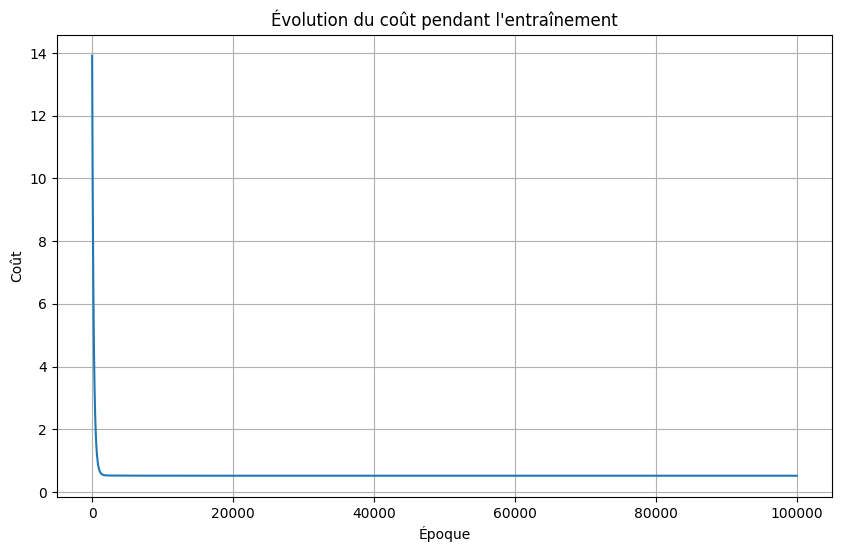

Coût sur le jeu de test : 0.5559059977531433


In [4]:
import torch
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Chargement des données California et normalisation
housing = fetch_california_housing()
scaler = StandardScaler()  # Normalisation des caractéristiques
data_x = scaler.fit_transform(housing['data'])
data_x = torch.tensor(data_x, dtype=torch.float32)
data_y = torch.tensor(housing['target'], dtype=torch.float32).view(-1, 1)

# Séparation des données en jeu d'entraînement (80%) et jeu de test (20%)
data_x_train, data_x_test, data_y_train, data_y_test = train_test_split(data_x, data_y, test_size=0.2, random_state=42)

print("Nombre d'exemples d'entraînement : ", data_x_train.size(0))
print("Nombre d'exemples de test : ", data_x_test.size(0))

# Initialisation des paramètres w et b
torch.manual_seed(1)
w = torch.randn(data_x.size(1), 1, requires_grad=False)  # w est de dimension (d, 1)
b = torch.randn(1, requires_grad=False)  # b est un scalaire

# Paramètres d'apprentissage
EPOCHS = 100000
LEARNING_RATE = 0.001
EPS = 1e-7
# Enregistrement des valeurs de coût pour chaque itération
cost_history = []

# Boucle d'entraînement - Descente de Gradient
for i in range(EPOCHS):
    # Calculer le coût sur les données d'entraînement
    cost = loss(data_x_train, w, b, data_y_train)

    # Ajouter le coût actuel à l'historique
    cost_history.append(cost.item())

    # Calculer les gradients
    grad_w, grad_b = getGradient(data_x_train, w, b, data_y_train)

    # Mettre à jour les paramètres
    with torch.no_grad():
        w -= LEARNING_RATE * grad_w  # Mise à jour des poids w
        b -= LEARNING_RATE * grad_b  # Mise à jour du biais b

    # Vérifier si la perte est suffisamment faible pour arrêter
    if cost < EPS:
        print(f"Convergence atteinte à l'itération {i}")
        break

    # Afficher la perte toutes les 1000 itérations pour suivre l'évolution
    if i % 1000 == 0:
        print(f'Epoch {i}, Cost: {cost.item()}')

# Afficher les valeurs finales de w et b
print("w final:", w)
print("b final:", b)

# Tracer la courbe du coût pendant l'entraînement
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.xlabel('Époque')
plt.ylabel('Coût')
plt.title('Évolution du coût pendant l\'entraînement')
plt.grid()
plt.show()

# Tester le modèle sur les données de test
cost_test = loss(data_x_test, w, b, data_y_test)
print(f'Coût sur le jeu de test : {cost_test.item()}')


